# kmeans - transformacja danych

  * Do zmiany układu współrzędnych (redukcji wymiarowości) używane jest zwykle SVD. 
  * Wynik grupowania można wykorzystać do transformacji (nieliniowej) danych. 
  * Idea podobna jest do metod kernelowych.


ZADANIE: Proszę wziąć dane ecoli z UCI. Podzielić na zbiór testowy i treningowy.

1. Uczymy logistyczną regresję i testujemy (accuracy)

2. 
    * Na zbiorze treningowym robimy k-means (5 klastrów) co daje podział. 
    * Dla każdego punktu liczymy odległość od każdego klastra. 
    * Odległości dają nam nowe współrzędne (tyle ile klastrów). 
    * Na takiej reprezentacji uczymy logistyczną regresję.

Proszę rozważyć odległość 

  * euklidesową do liczenia odległości od klastra 
  * jak również: 

    $$
    d(x,y) = 1-\exp(a \|x-y\|^2),
    $$
    gdzie $a$ to parameter.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(filepath_or_buffer='ecoli.dat',  header=None, sep=',')
df.head()

,0,1,2,3,4,5,6,7
0,49.0,29.0,48.0,5.0,56.0,24.0,35.0,cp
1,7.0,4.0,48.0,5.0,54.0,35.0,44.0,cp
2,56.0,4.0,48.0,5.0,49.0,37.0,46.0,cp
3,59.0,49.0,48.0,5.0,52.0,45.0,36.0,cp
4,23.0,32.0,48.0,5.0,55.0,25.0,35.0,cp


Zaprezentuj dane jako macierze:

   * X
   * y

zawierające odpowiednie dane i przydziały do grup.
  

In [2]:
X = np.array(df.iloc[:, :-1])
X
print(X.shape)
y = df.iloc[:,-1]

labels = set(y)
labels
#{cp,im,imS,imL,imU,om,omL,pp

z = {'cp':0, 'im':1, 'imL':2, 'imS':3, 'imU':4, 'om':5, 'omL':6, 'pp':7}

y = np.array([z[key] for key in y])
y

(336, 7)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,

Podziel dane na train/test

In [3]:
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_train.shape[0])
print(X_test.shape[0])

268
68


Wykonaj reprezentację 2D za pomocą t-SNE

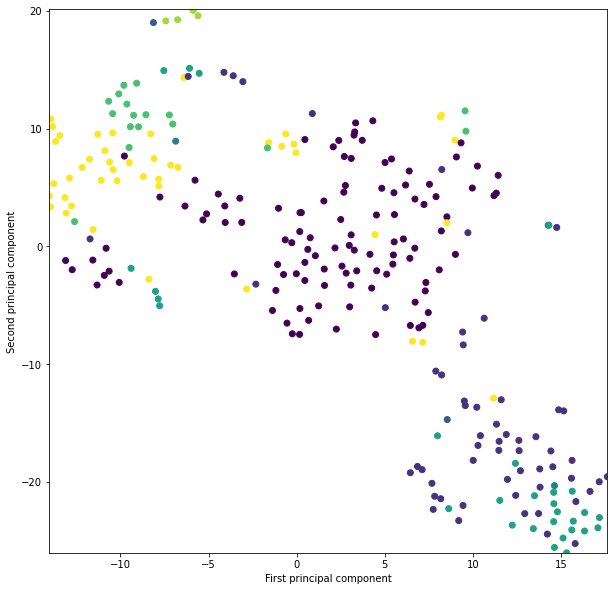

In [4]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
X_tsne = tsne.fit_transform(X_train)

from matplotlib import colors as mcolors

# colors = list(mcolors.CSS4_COLORS)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=(10, 10))
plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max())
plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max())
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = y_train)    
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

Wykonaj klastrowanie k-means z k = 5

naucz metodę na X_train
przydziel elementy z X_test do odpowiednich klastrów wykorzystując model nauczony na X_train

In [5]:
n = 5

from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=n, random_state = 42)
# slice matrix so we only include the 0/1 indicator columns in the clustering
clust_train = cluster.fit_predict(X_train)

clust_test = cluster.predict(X_test)

Wykonaj reprezentację danych

In [6]:
from scipy.spatial.distance import sqeuclidean
import math
a = 0.0001

def dist(X, centers, a):
    data = np.array([[1-sqeuclidean(X[i], centers[k]) for k in range(n)] for i in range(X.shape[0])])
    return data


# def dist(X, centers, a):
#     data = np.array([[1-math.exp(-a*sqeuclidean(X[i], centers[k])) for k in range(n)] for i in range(X.shape[0])])
#     return data

In [7]:
data_train = dist(X_train, cluster.cluster_centers_, a)
data_test = dist(X_test, cluster.cluster_centers_, a)

Wykonaj reprezentację 2D za pomocą t-SNE

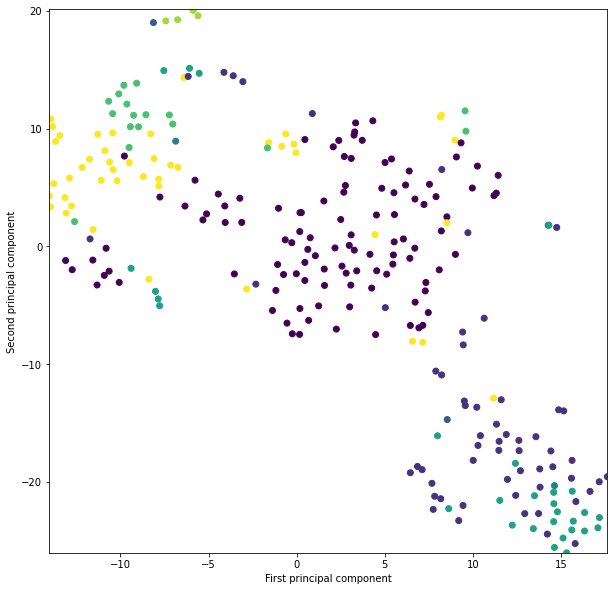

In [8]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
X_tsne = tsne.fit_transform(X_train)

from matplotlib import colors as mcolors

# colors = list(mcolors.CSS4_COLORS)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=(10, 10))
plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max())
plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max())
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = y_train)    
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

Naucz logistyczną regresję na nowej reprezentacji:

In [9]:
from sklearn.metrics import accuracy_score

logreg = linear_model.LogisticRegression(C=1e5, random_state= 42) 

logreg.fit(data_train, y_train)
y_train_pred = logreg.predict(data_train)
acc_train = accuracy_score(y_train, y_train_pred)
print("Dokładność na zbiorze treningowym ", acc_train)
    
y_test_pred = logreg.predict(data_test)
acc_test = accuracy_score(y_test, y_test_pred)
print("Dokładność na zbiorze testowym ", acc_test)

Dokładność na zbiorze treningowym  0.7611940298507462
Dokładność na zbiorze testowym  0.8088235294117647


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naucz logistyczną regresję na oryginalnych danych:

In [10]:
logreg = linear_model.LogisticRegression(C=1e5, random_state = 42) # w prakcy powinniśmy dopasować parametr c
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100000.0, random_state=42)

Porównaj wyniki na zbiorze testującym za pomocą 

```python
accuracy_score
```


In [11]:
from sklearn.metrics import accuracy_score

y_train_pred = logreg.predict(X_train)
print("Dokładność na zbiorze treningowym ", accuracy_score(y_train, y_train_pred))



y_test_pred = logreg.predict(X_test)
print("Dokładność na zbiorze test ", accuracy_score(y_test, y_test_pred))

Dokładność na zbiorze treningowym  0.8022388059701493
Dokładność na zbiorze test  0.8235294117647058


In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,

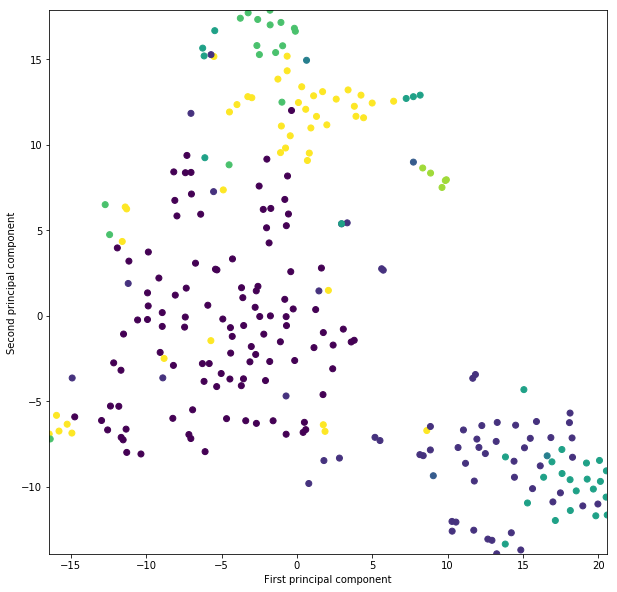

In [74]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
X_tsne = tsne.fit_transform(data_train)

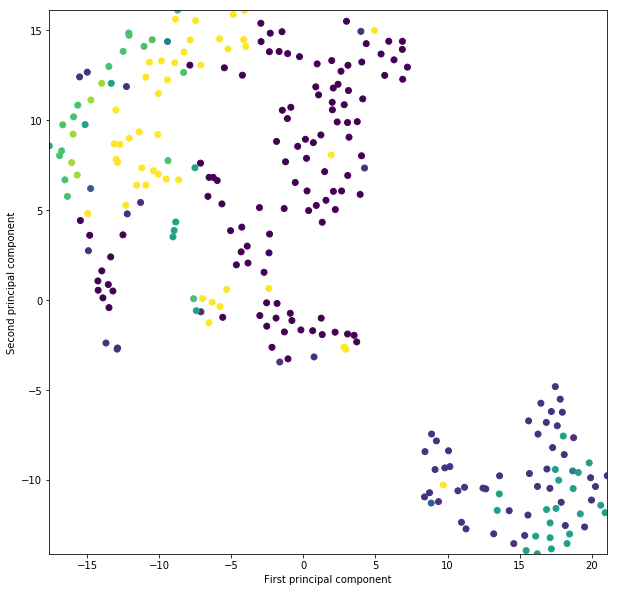

In [75]:
from matplotlib import colors as mcolors

# colors = list(mcolors.CSS4_COLORS)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=(10, 10))
plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max())
plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max())
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()